In [0]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle
!echo '{"username":"varkel","key":"b2c8d6cd668bb1cfbfdbd7513519effd"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d harrywang/housing -p data
!kaggle competitions download -c mercari-price-suggestion-challenge -p data


    100% |████████████████████████████████| 61kB 4.1MB/s 
  0% 0.00/400k [00:00<?, ?B/s]
100% 400k/400k [00:00<00:00, 81.2MB/s]
  0% 0.00/170k [00:00<?, ?B/s]
100% 170k/170k [00:00<00:00, 58.0MB/s]
 50% 17.0M/34.0M [00:00<00:00, 29.7MB/s]
100% 34.0M/34.0M [00:00<00:00, 85.3MB/s]
 71% 53.0M/74.3M [00:00<00:00, 37.4MB/s]
100% 74.3M/74.3M [00:00<00:00, 85.3MB/s]
 64% 5.00M/7.77M [00:00<00:00, 47.4MB/s]
100% 7.77M/7.77M [00:00<00:00, 67.6MB/s]
 96% 284M/294M [00:04<00:00, 57.6MB/s]
100% 294M/294M [00:05<00:00, 60.9MB/s]


In [0]:
!apt-get install p7zip-full
!p7zip -k -d data/train.tsv.7z 


Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-6).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.

7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 77912192 bytes (75 MiB)

Extracting archive: data/train.tsv.7z
--
Path = data/train.tsv.7z
Type = 7z
Physical Size = 77912192
Headers Size = 122
Method = LZMA2:24
Solid = -
Blocks = 1

  0%      3% - train.tsv                  7% - train.tsv                 11% - train.tsv                 14% - train.tsv                 18% - train.tsv                

In [0]:
!mv train.tsv data/train.tsv


In [0]:
import pandas as pd
train = pd.read_table('data/train.tsv')


In [0]:
train.head()

train_id                                 name  item_condition_id  \
0         0  MLB Cincinnati Reds T Shirt Size XL                  3   
1         1     Razer BlackWidow Chroma Keyboard                  3   
2         2                       AVA-VIV Blouse                  1   
3         3                Leather Horse Statues                  1   
4         4                 24K GOLD plated rose                  1   

                                       category_name brand_name  price  \
0                                  Men/Tops/T-shirts        NaN   10.0   
1  Electronics/Computers & Tablets/Components & P...      Razer   52.0   
2                        Women/Tops & Blouses/Blouse     Target   10.0   
3                 Home/Home Décor/Home Décor Accents        NaN   35.0   
4                            Women/Jewelry/Necklaces        NaN   44.0   

   shipping                                   item_description  
0         1                                 No description yet  
1         0  This keyboard is in great condition and works ...  
2         1  Adorable top with a hint of lace and a key hol...  
3         1  New with tags. Leather horses. Retail for [rm]...  
4         0          Complete with certificate of authenticity

In [0]:
train.describe()

train_id  item_condition_id         price      shipping
count  1.482535e+06       1.482535e+06  1.482535e+06  1.482535e+06
mean   7.412670e+05       1.907380e+00  2.673752e+01  4.472744e-01
std    4.279711e+05       9.031586e-01  3.858607e+01  4.972124e-01
min    0.000000e+00       1.000000e+00  0.000000e+00  0.000000e+00
25%    3.706335e+05       1.000000e+00  1.000000e+01  0.000000e+00
50%    7.412670e+05       2.000000e+00  1.700000e+01  0.000000e+00
75%    1.111900e+06       3.000000e+00  2.900000e+01  1.000000e+00
max    1.482534e+06       5.000000e+00  2.009000e+03  1.000000e+00

In [0]:
for column in train.columns:
  print (column)
  print ('type', train[column].dtype)
  print ('unique values', len(train[column].value_counts()))
  print ("\n")

train_id
type int64
unique values 1482535


name
type object
unique values 1225273


item_condition_id
type int64
unique values 5


category_name
type object
unique values 1287


brand_name
type object
unique values 4809


price
type float64
unique values 828


shipping
type int64
unique values 2


item_description
type object
unique values 1281426




In [0]:
train.isna().any()

train_id             False
name                 False
item_condition_id    False
category_name         True
brand_name            True
price                False
shipping             False
item_description      True
dtype: bool

In [0]:
# How many NaNs per column?
for column in train.columns:
  if (train[column].isna().any()):
    print (column)
    print (train[column].isna().sum(), 'NaNs')
    print ('')

category_name
6327 NaNs

brand_name
632682 NaNs

item_description
4 NaNs



In [0]:
# How many 0 price items?
(train['price'] == 0).sum()

874

In [0]:
train[train['price'] == 0].loc[33176, 'item_description']

"Mens Bushnell Golf watch NWOT If you are a golfer this watch would be great for you it's new only taken out the box. Come with the box and the instructions and the charger everything is included."

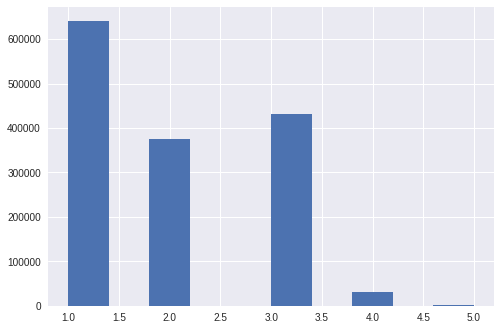

In [0]:
# Item condition histogram
train['item_condition_id'].hist()

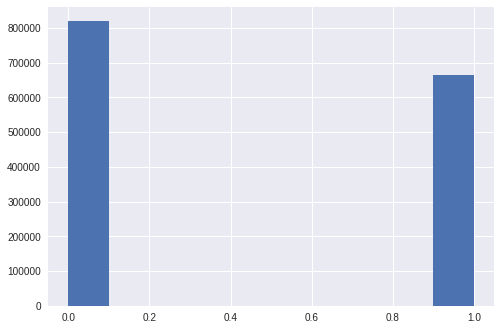

In [0]:
# Shipping histogram
train['shipping'].hist()

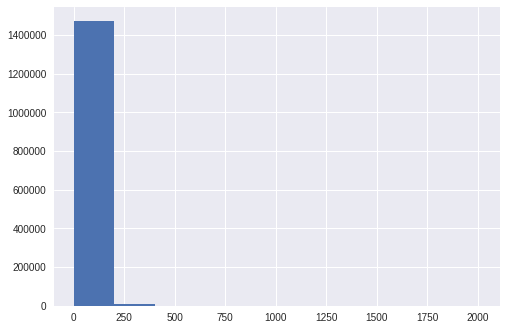

In [0]:
train['price'].hist()


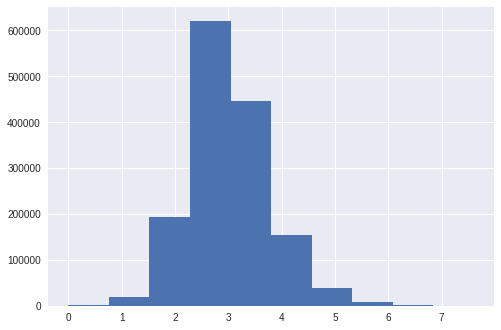

In [0]:
import numpy as np
train['price'].apply(lambda x: np.log1p(x)).hist()

In [0]:
# split to train and validation
X_train, X_valid, y_train, y_valid = train_test_split(train.drop(columns='price'),
                                                      train['price'].values.astype('float32'), test_size=0.1,
                                                      random_state=0)


In [0]:
import spacy as sp
nlp = sp.load('en')

def show_word_count_hist(column):
  return X_valid[column].apply(lambda x: len(nlp(x.strip().lower()))).hist()

  

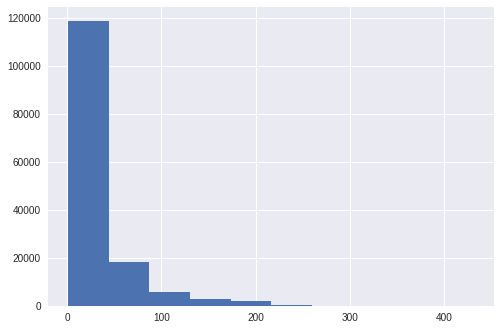

In [0]:
show_word_count_hist('item_description')

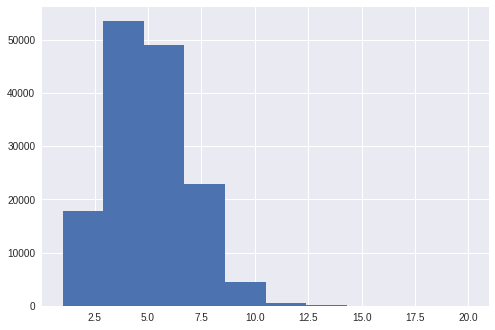

In [0]:
show_word_count_hist('name')

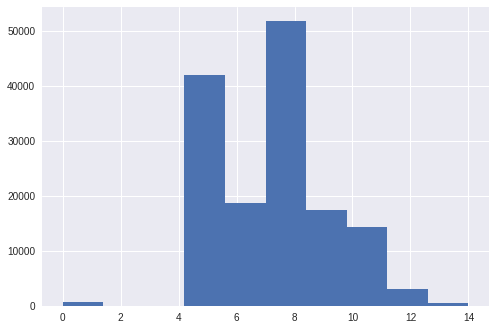

In [0]:
show_word_count_hist('category_name')

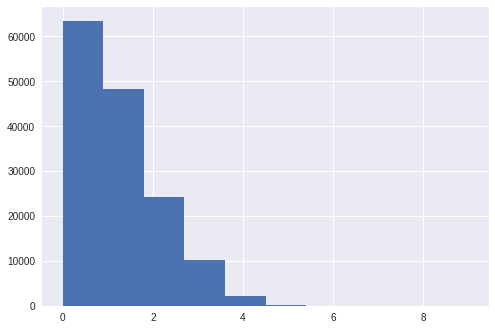

In [0]:
show_word_count_hist('brand_name')

In [0]:
y_mean = np.mean(y_train)
y_mean

26.767502

In [0]:
# Calc RMSLE for the average regressor
np.mean((np.log1p(y_train) - np.log1p(y_mean))**2) ** 0.5

0.8251962876173048